# Imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import scipy.sparse as sps
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

# Carregando os dados de validação

In [25]:
start = time.time()
vetor_train_target = sps.load_npz('data/sparse_matrix_train_target_small.npz').tocsr()
matriz_train       = sps.load_npz('data/sparse_matrix_train_small.npz').tocsr()
matriz_test        = sps.load_npz('data/sparse_matrix_test_small.npz' ).tocsr()
end = time.time()

print('Tempo de carregamento das Matrizes: '+str("%.2f" % (end - start))+'s\n')

Tempo de carregamento das Matrizes: 0.06s



# Configuração do k-fold

In [26]:
#np.random.seed(0) - random_state

# A validação cruzada é feita através de análise de partições pequenas
# e mutuamente exclusivas dos datasets originais

# Quantidade de divisões a serem usadas pelo k-fold
n_splits = 10

# Número de linhas utilizadas em cada divisão
max_split_size = 1000

# Obtendo conjunto de dados menor, através da escolha anterior
num_linhas_treino = matriz_train.shape[0]

if(max_split_size*n_splits > num_linhas_treino):
    max_split_size = int(np.floor(num_linhas_treino/n_splits))

inicio_faixa = np.random.randint(0,num_linhas_treino-max_split_size*n_splits+1)
fim_faixa  = inicio_faixa + max_split_size*n_splits
matriz_train = matriz_train[inicio_faixa:fim_faixa]
vetor_train_target = vetor_train_target[inicio_faixa:fim_faixa]

print("Utilizando intervalo "+str(inicio_faixa)+":"+str(fim_faixa)+" do conjunto de treino para validação, "+str(fim_faixa-inicio_faixa)+" linhas.")
print("K-Fold utilizando "+str(n_splits)+" partições de "+str(max_split_size)+" linhas do conjunto de treino.")

Utilizando intervalo 0:4630 do conjunto de treino para validação, 4630 linhas.
K-Fold utilizando 10 partições de 463 linhas do conjunto de treino.


# Avaliando Regressores

Após a etapa de pré-processamento de dados, começamos a avaliar o desempenho de alguns regressores em busca de encontrar os que consigam melhores resultados, a partir das matrizes geradas dos dados do conjunto de treino e do conjunto de teste.

## Avaliando regressor linear

Tempo de processamento do regressor linear: 2.78s


RMSE MEAN:  0.2595
RMSE STD:   0.0101 




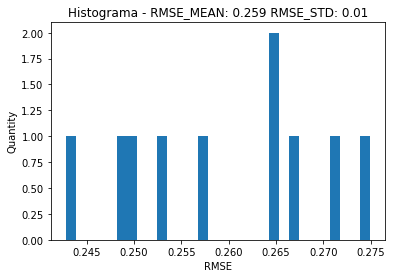

In [41]:
from sklearn.linear_model import LinearRegression
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target

kf = KFold(n_splits=n_splits);

# Validação cruzada    
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
        
    # Criando Regressor Linear
    regr = LinearRegression(n_jobs = -1)
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 
    
    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do regressor linear: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor Ridge

Tempo de processamento do regressor ridge: 0.89s


RMSE MEAN:  0.2397
RMSE STD:   0.0093 




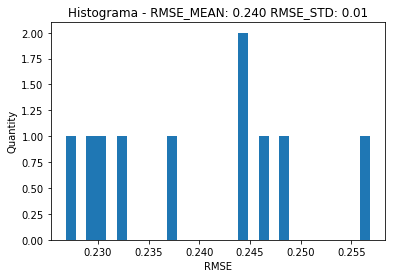

In [42]:
from sklearn.linear_model import Ridge
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=n_splits);
 
# Validação cruzada    
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    # Criando Regressor Linear
    regr = Ridge(alpha = 29.0)

    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)))

end = time.time()

print('Tempo de processamento do regressor ridge: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor GradientBoosting

Tempo de processamento do GradientBoostingRegressor : 103.36s


RMSE MEAN:  0.2501
RMSE STD:   0.0097 




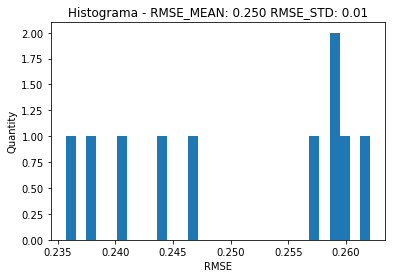

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=n_splits);
    
# Validação cruzada    
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    # Criando Regressor Linear
    regr = GradientBoostingRegressor(learning_rate = 0.01)

    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do GradientBoostingRegressor : '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor SVM

Tempo de processamento do regressor SVM: 39.47s


RMSE MEAN:  0.2559
RMSE STD:   0.0084 




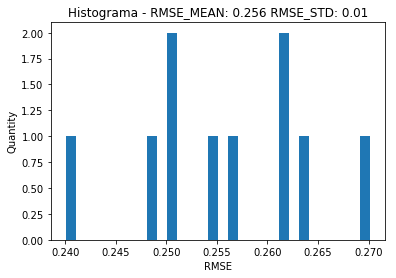

In [44]:
from sklearn.svm import SVR
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=n_splits);
    
# Validação cruzada    
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test];
    y_train, y_test = y[train], y[test];

    # Criando Regressor SVM
    regr = SVR('linear')
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do regressor SVM: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regresor KNN

Tempo de processamento do regressor KNN: 1.41s


RMSE MEAN:  0.2428
RMSE STD:   0.0111 




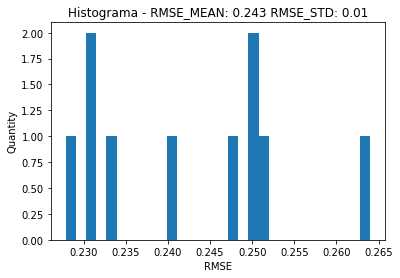

In [45]:
from sklearn.neighbors import KNeighborsRegressor
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=n_splits);
    
# Validação cruzada    
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test];
    y_train, y_test = y[train], y[test];

    # Criando Regressor KNN
    regr = KNeighborsRegressor(algorithm='auto', leaf_size=50, metric='minkowski',
                               metric_params=None, n_jobs=1, n_neighbors=30, p=2,
                               weights='distance')
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do regressor KNN: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor LGBM

In [ ]:
from lightgbm import LGBMRegressor
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=n_splits);
    
# Validação cruzada    
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test];
    y_train, y_test = y[train], y[test];

    # Criando Regressor LGBM
    regr = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                         learning_rate=0.05, max_depth=-1, min_child_samples=20,
                         min_child_weight=0.001, min_split_gain=0.0, n_estimators=15,
                         n_jobs=-1, num_leaves=5, objective='regression', random_state=None,
                         reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                         subsample_for_bin=200000, subsample_freq=1) 
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel(),  eval_metric='metric') 

    # Predição     
    y_pred = regr.predict(X_test)
    
   #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do regressor LGBM: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor XGBoost

Tempo de processamento do regressor linear: 11.04s


RMSE MEAN:  0.2472
RMSE STD:   0.0089 




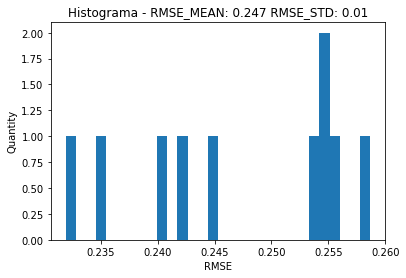

In [46]:
from xgboost import XGBRegressor
start = time.time()

rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=n_splits);
    
# Validação cruzada    
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test];
    y_train, y_test = y[train], y[test];
        
    # Criando Regressor Linear
    regr = XGBRegressor(n_estimators=30)
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 
    
    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do regressor linear: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Combinando Regressores

Em busca da melhoria dos resultados obtidos, decidimos fazer uso de Ensemblers, que são métodos que combinam previsões de diferentes modelos para a geração de uma previsão final de melhor desempenho. Fizemos neste trabalho, testes com Bagging, AdaBoosting e Stacking.

# Utilizando Bagging

In [27]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.utils import check_random_state
from sklearn.ensemble import BaggingRegressor
#from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

#randomState = check_random_state(0)
rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=2);


# Parametros a serem variados no bagging
grid = ParameterGrid({"max_samples": [0.5, 1.0],
                      "max_features": [0.5, 1.0],
                      "bootstrap": [True, False],
                      "bootstrap_features": [True, False]})

# Testando cada estimador com cada configuração de parametros

for base_estimator in [ 
                        Ridge(alpha = 29.0),
                        GradientBoostingRegressor(learning_rate = 0.01),
                        DummyRegressor(),
                        DecisionTreeRegressor(),
                        SVR(),
                        KNeighborsRegressor(),
                        #LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05, n_estimators=15),
                        XGBRegressor()]:
    for params in grid:
        start = time.time()
        
        rmse_list =[]

        for train, test in kf.split(X):
            X_train, X_test = X[train], X[test];
            y_train, y_test = y[train], y[test];
            
            # Criando Regressor Bagging
            regr = BaggingRegressor(base_estimator=base_estimator,
                                 **params)

            # Treino
            regr.fit(X_train, y_train.toarray().ravel()) 

            # Predição     
            y_pred = regr.predict(X_test)

            #Root mean squared error
            rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));
            end = time.time()

        print('Tempo de processamento do regressor Bagging - Estimador: ' + str(base_estimator) + ' params: ' + str(params) + ': '+str("%.2f" % (end - start))+'s\n')
        print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
        print("RMSE STD:  ","%.4f" % np.std(rmse_list))
        print("\n")

Tempo de processamento do regressor Bagging - Estimador: Ridge(alpha=29.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) params: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.5}: 1.39s

RMSE MEAN:  0.2484
RMSE STD:   0.0008


Tempo de processamento do regressor Bagging - Estimador: Ridge(alpha=29.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) params: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 1.0}: 1.13s

RMSE MEAN:  0.2451
RMSE STD:   0.0015


Tempo de processamento do regressor Bagging - Estimador: Ridge(alpha=29.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) params: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 0.5}: 1.74s

RMSE MEAN:  0.2440
RMSE STD:   0.0007


T

KeyboardInterrupt: 

## Utlizando AdaBoosting

In [28]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.utils import check_random_state
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

#randomState = check_random_state(0)
rmse_list =[]
X = matriz_train
y = vetor_train_target
kf = KFold(n_splits=2);


# Parametros a serem variados no bagging
grid = ParameterGrid({"loss": ['linear', 'square', 'exponential']})

# Testando cada estimador com cada configuração de parametros
for base_estimator in [ 
                        Ridge(alpha = 29.0),
                        GradientBoostingRegressor(learning_rate = 0.01),
                        DummyRegressor(),
                        DecisionTreeRegressor(),
                        SVR(),
                        KNeighborsRegressor(),
                        LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
                                             learning_rate=0.05, max_depth=-1, min_child_samples=20,
                                             min_child_weight=0.001, min_split_gain=0.0, n_estimators=25,
                                             n_jobs=-1, num_leaves=200, objective='regression', random_state=None,
                                             reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                                             subsample_for_bin=200000, subsample_freq=1, task='train'),
                        XGBRegressor()]:
    for params in grid:
        start = time.time()
        
        rmse_list =[]

        for train, test in kf.split(X):
            X_train, X_test = X[train], X[test];
            y_train, y_test = y[train], y[test];
            
            # Criando AdaBoostRegressor
            regr = AdaBoostRegressor(base_estimator=base_estimator,
                                 **params)

            # Treino
            regr.fit(X_train, y_train.toarray().ravel()) 

            # Predição     
            y_pred = regr.predict(X_test)

            #Root mean squared error
            rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));
            end = time.time()

        print('Tempo de processamento do regressor Adaboost - Estimador: ' + str(base_estimator) + ' params: ' + str(params) + ': '+str("%.2f" % (end - start))+'s\n')
        print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
        print("RMSE STD:  ","%.4f" % np.std(rmse_list))
        print("\n")

Tempo de processamento do regressor Adaboost - Estimador: Ridge(alpha=29.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) params: {'loss': 'linear'}: 5.18s

RMSE MEAN:  0.2532
RMSE STD:   0.0041


Tempo de processamento do regressor Adaboost - Estimador: Ridge(alpha=29.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) params: {'loss': 'square'}: 19.94s

RMSE MEAN:  0.3031
RMSE STD:   0.0024


Tempo de processamento do regressor Adaboost - Estimador: Ridge(alpha=29.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) params: {'loss': 'exponential'}: 22.50s

RMSE MEAN:  0.2843
RMSE STD:   0.0017


Tempo de processamento do regressor Adaboost - Estimador: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features

KeyboardInterrupt: 

## Utilizando Stacking

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.utils import check_random_state
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from mlxtend.regressor import StackingRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

rmse_list =[]
X= matriz_train
y= vetor_train_target
X_test  = matriz_test
kf = KFold(n_splits=2);

# Definindo estimadores da primeira camada
estimators_L1 = [
    ( ExtraTreesRegressor(random_state=0, n_jobs=-1, 
                               n_estimators=40, max_depth=3)),
    (BaggingRegressor(LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                     learning_rate=0.05, max_depth=-1, min_child_samples=20,
                     min_child_weight=0.001, min_split_gain=0.0, n_estimators=25,
                     n_jobs=-1, num_leaves=270, objective='regression', random_state=None,
                     reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                     subsample_for_bin=200000, subsample_freq=1, task='train'))),
    (RidgeCV(alphas = [0.1, 1.0, 10.0])),
    (XGBRegressor()),
    (BaggingRegressor(Ridge(alpha = 29.0,random_state=5), bootstrap = False, bootstrap_features= True, max_features = 1.0, max_samples = 1.0, n_jobs=-1)), 
    (BaggingRegressor(KNeighborsRegressor(30, 'distance', 'auto', 50), 
                           bootstrap = False, bootstrap_features= False, max_features = 1.0, max_samples = 1.0, n_jobs=-1, random_state=0))
]

# Definindo estimador final
final_estimator = BaggingRegressor(( ExtraTreesRegressor(random_state=0, n_jobs=-1, 
                               n_estimators=30, max_depth=2)), bootstrap = False,
                                   bootstrap_features= True, max_features = 1.0, max_samples = 0.5, n_jobs=-1,random_state=0)

start = time.time()


# Validação cruzada    
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test];
    y_train, y_test = y[train], y[test];

    # Criando Stacking Regressor 
    stregr = StackingRegressor(regressors=estimators_L1, 
                           meta_regressor=final_estimator)

    # Treino
    stregr = StackingRegressor(regressors=estimators_L1, 
                           meta_regressor=final_estimator)

    stregr.fit(X_train, y_train.toarray().ravel()) 
    
    # Predição     
    y_pred = stregr.predict(X_test)
    
    #Root mean squared error
    rmse_list.append(np.sqrt(mean_squared_error(y_test.todense(), y_pred)));

end = time.time()

print('Tempo de processamento do regressor linear: '+str("%.2f" % (end - start))+'s\n\n')
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list), '\n\n')


Tempo de processamento do regressor linear: 36.22s


RMSE MEAN:  0.2418
RMSE STD:   0.0012 




# Carregando os dados completos 

In [ ]:
start = time.time()
vetor_train_target = sps.load_npz('data/sparse_matrix_train_target.npz').tocsr()
matriz_train       = sps.load_npz('data/sparse_matrix_train.npz').tocsr()
matriz_test        = sps.load_npz('data/sparse_matrix_test.npz' ).tocsr()
end = time.time()

print('Tempo de carregamento das Matrizes: '+str("%.2f" % (end - start))+'s\n')

# Utilizando regressor em dados de teste

In [ ]:
X_train = matriz_train
y_train = vetor_train_target
X_test  = matriz_test

# Criando Regressor Ridge
regr = Ridge(alpha = 29.0)

# Treino
regr.fit(X_train, y_train.toarray().ravel()) 

# Predição      
y_pred = regr.predict(X_test)

# Melhorando resultado
def fronteira(y):
    if y >1:
        return 1.0
    elif y <0:
        return 0.0
    else:
        return y
    
y_pred = np.array(list(map(fronteira, y_pred)))


# Salvando o resultado

In [5]:
df_test_item_id  = pd.read_csv('./data/test.csv' , encoding='utf8')['item_id'].head(y_pred.shape[0])
df_y_pred = pd.DataFrame(y_pred, columns = ['deal_probability'])
df_resultado = pd.concat([df_test_item_id,df_y_pred],axis =1)
df_resultado.to_csv('submission.csv', encoding='utf-8', index=False)